Cosmetecor MultiElectrode EMF Dataset
==================

Multi-electrode ground measurement technique was introduced by Docent D. Kuznetsov in the 1980s as an earthquake prediction method. There are currently several stations collecting EMF data using the Kuznetsov's technique. These data are archived in an FTP site: 
<ftp://cosmetecor.org/archive_all/>

In this Notebook, we will develop a couple of functions to do the following:
* Automatically extract, unzip and glue together dataset from the FTP site
* Display these measurements
* Verify if these EMF measurement actually predict earthquake


In [1]:
# As usual, a bit of setup

import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import csv
import h5py
import sys

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## FTP connect and list files


In [2]:
import ftplib

#Open ftp connection
ftp = ftplib.FTP('ftp.cosmetecor.org', 'anonymous','luke8liem@gamil.com')
ftp.cwd("/archive_all/2017/s6-chieti_2017/")

#There are 2 ways to list the files in the current directory
# The fast way
ftp.retrlines('LIST')

# The slower way, but you get the list of files names in an array
files = []

try:
    files = ftp.nlst()
except ftplib.error_perm, resp:
    if str(resp) == "550 No files found":
        print "No files in this directory"
    else:
        raise

for f in files:
    print f
    
ftp.quit()

-rw-r--r--    1 ftp      ftp       2073569 Jan 02 00:01 S6-CHIETI-170101.7z
-rw-r--r--    1 ftp      ftp       1981949 Jan 03 00:01 S6-CHIETI-170102.7z
-rw-r--r--    1 ftp      ftp       2639136 Jan 04 00:01 S6-CHIETI-170103.7z
-rw-r--r--    1 ftp      ftp       2833507 Jan 05 00:01 S6-CHIETI-170104.7z
-rw-r--r--    1 ftp      ftp       1971444 Jan 06 00:01 S6-CHIETI-170105.7z
-rw-r--r--    1 ftp      ftp       1581184 Jan 07 00:01 S6-CHIETI-170106.7z
-rw-r--r--    1 ftp      ftp       2243103 Jan 08 00:01 S6-CHIETI-170107.7z
-rw-r--r--    1 ftp      ftp       3361935 Jan 09 00:01 S6-CHIETI-170108.7z
-rw-r--r--    1 ftp      ftp       3181656 Jan 10 00:01 S6-CHIETI-170109.7z
-rw-r--r--    1 ftp      ftp       3348624 Jan 11 00:01 S6-CHIETI-170110.7z
-rw-r--r--    1 ftp      ftp       3122626 Jan 12 00:01 S6-CHIETI-170111.7z
-rw-r--r--    1 ftp      ftp       2874728 Jan 13 00:01 S6-CHIETI-170112.7z
-rw-r--r--    1 ftp      ftp       3489998 Jan 14 00:01 S6-CHIETI-170113.7z
-rw-r--r--  

'221 Goodbye.'

## Extract files

The data collected at each station is archived in folders "/archive_all/YEAR/STATION_NAME/" at the FTP site. The files are a mix of .LOG and .7Z files (.7Z files can be decompressed into .LOG files using Winzip).

For the Italian Chieti (Station 6), the download generated 1556 .LOG files (each representing 1 day of data). Each .LOG file has 86400 rows of data (24hr x 60min x 60sec). Each row consists of:
(1) Datetime
(2) 32 measurements

In [3]:
import ftplib

#Open ftp connection
ftp = ftplib.FTP('ftp.cosmetecor.org', 'anonymous','luke8liem@gmail.com')


ftp.cwd("/archive_all/2013/s6-chieti/")

# Generate a list of files names in the current directory
files = []

try:
    files = ftp.nlst()
except ftplib.error_perm, resp:
    if str(resp) == "550 No files found":
        print "No files in this directory"
    else:
        raise

# Extract all the files in the current directory into a local folder        
for f in files:
    command = "RETR "+ f   # RETR Filename
    destination = "cosmetecor data/s6-chieti/"+f
    print "Extracting %s" % f
    dFile = open(destination, "wb")
    ftp.retrbinary(command, dFile.write)
    dFile.close()               


ftp.cwd("/archive_all/2014/s6-chieti/")

# Generate a list of files names in the current directory
files = []

try:
    files = ftp.nlst()
except ftplib.error_perm, resp:
    if str(resp) == "550 No files found":
        print "No files in this directory"
    else:
        raise

# Extract all the files in the current directory into a local folder        
for f in files:
    command = "RETR "+ f   # RETR Filename
    destination = "cosmetecor data/s6-chieti/"+f
    print "Extracting %s" % f
    dFile = open(destination, "wb")
    ftp.retrbinary(command, dFile.write)
    dFile.close()

ftp.cwd("/archive_all/2015/s6-chieti_2015/")

# Generate a list of files names in the current directory
files = []

try:
    files = ftp.nlst()
except ftplib.error_perm, resp:
    if str(resp) == "550 No files found":
        print "No files in this directory"
    else:
        raise

# Extract all the files in the current directory into a local folder        
for f in files:
    command = "RETR "+ f   # RETR Filename
    destination = "cosmetecor data/s6-chieti/"+f
    print "Extracting %s" % f
    dFile = open(destination, "wb")
    ftp.retrbinary(command, dFile.write)
    dFile.close()    

ftp.cwd("/archive_all/2016/s6-chieti_2016/")

# Generate a list of files names in the current directory
files = []

try:
    files = ftp.nlst()
except ftplib.error_perm, resp:
    if str(resp) == "550 No files found":
        print "No files in this directory"
    else:
        raise

# Extract all the files in the current directory into a local folder        
for f in files:
    command = "RETR "+ f   # RETR Filename
    destination = "cosmetecor data/s6-chieti/"+f
    print "Extracting %s" % f
    dFile = open(destination, "wb")
    ftp.retrbinary(command, dFile.write)
    dFile.close()    

ftp.cwd("/archive_all/2017/s6-chieti_2017/")

# Generate a list of files names in the current directory
files = []

try:
    files = ftp.nlst()
except ftplib.error_perm, resp:
    if str(resp) == "550 No files found":
        print "No files in this directory"
    else:
        raise

# Extract all the files in the current directory into a local folder        
for f in files:
    command = "RETR "+ f   # RETR Filename
    destination = "cosmetecor data/s6-chieti/"+f
    print "Extracting %s" % f
    dFile = open(destination, "wb")
    ftp.retrbinary(command, dFile.write)
    dFile.close()    
    
ftp.quit()

Extracting S6-CHIETI-140101.log
Extracting S6-CHIETI-140102.log
Extracting S6-CHIETI-140103.log
Extracting S6-CHIETI-140104.log
Extracting S6-CHIETI-140105.log
Extracting S6-CHIETI-140106.log
Extracting S6-CHIETI-140107.log
Extracting S6-CHIETI-140108.log
Extracting S6-CHIETI-140109.log
Extracting S6-CHIETI-140110.log
Extracting S6-CHIETI-140111.log
Extracting S6-CHIETI-140112.log
Extracting S6-CHIETI-140113.log
Extracting S6-CHIETI-140114.log
Extracting S6-CHIETI-140115.log
Extracting S6-CHIETI-140116.log
Extracting S6-CHIETI-140117.log
Extracting S6-CHIETI-140118.log
Extracting S6-CHIETI-140119.log
Extracting S6-CHIETI-140120.log
Extracting S6-CHIETI-140121.log
Extracting S6-CHIETI-140122.log
Extracting S6-CHIETI-140123.log
Extracting S6-CHIETI-140124.log
Extracting S6-CHIETI-140125.log
Extracting S6-CHIETI-140126.log
Extracting S6-CHIETI-140127.log
Extracting S6-CHIETI-140128.log
Extracting S6-CHIETI-140129.log
Extracting S6-CHIETI-140130.log
Extracting S6-CHIETI-140131.log
Extracti

'221 Goodbye.'

## Display Data

Let's start with 1 .LOG file and try to display the data.

In [35]:
import random
import numpy as np
import matplotlib.pyplot as plt
import csv
from data_util.data_analyze import *

num = num_datapoints('cosmetecor data\s6-chieti\S6-CHIETI-170501.LOG', dict=False)  # The data has no header
print num


with open('cosmetecor data\s6-chieti\S6-CHIETI-170501.LOG', 'rb') as f:
    reader = csv.reader(f, delimiter=' ')
    i = 0
    for row in reader:
        i += 1
        if i is 1:
            print "There are %d items per row of data" %len(row) 
            
        if i < 3:
            print row   # Print first 5 rows
            
        if i > num-3:    
            print row   # Print last 5 rows      
               
f.close()


86391
There are 34 items per row of data
['2017.05.01', '00:00:01', '-29.826', '106.691', '63.315', '-105.221', '-34.674', '-34.104', '-53.302', '149.629', '-25.316', '210.631', '-49.117', '62.418', '-51.646', '167.299', '124.771', '176.304', '531.830', '103.624', '366.413', '213.627', '467.760', '52.950', '455.705', '452.603', '0.648', '408.466', '0.583', '151.133', '163.011', '174.806', '185.487', '195.899']
['2017.05.01', '00:00:02', '-29.818', '106.674', '63.308', '-105.206', '-34.667', '-34.102', '-53.305', '149.633', '-25.316', '210.635', '-49.117', '62.436', '-51.628', '167.319', '124.792', '176.326', '531.834', '103.609', '366.429', '213.617', '467.763', '52.974', '455.706', '452.608', '0.648', '408.471', '0.583', '151.118', '162.995', '174.789', '185.469', '195.881']
['2017.05.01', '23:59:58', '-39.221', '123.515', '70.263', '-119.594', '-42.213', '-34.535', '-60.239', '144.745', '-26.664', '207.887', '-52.299', '46.148', '-45.602', '149.951', '104.302', '155.768', '560.147', 

## Plot the Data in 1 Log File

(32L, 86391L)
Data from Station 6 (Chieti)
Column 2
Min: -39.458000
Max: 16.738000
Column 3
Min: 35.277000
Max: 123.673000
Column 4
Min: 39.845000
Max: 70.484000
Column 5
Min: -119.616000
Max: -61.078000
Column 6
Min: -42.237000
Max: -2.095000
Column 7
Min: -34.619000
Max: -23.039000
Column 8
Min: -60.260000
Max: -21.636000
Column 9
Min: 144.415000
Max: 176.893000
Column 10
Min: -26.664000
Max: -25.281000
Column 11
Min: 207.322000
Max: 233.200000
Column 12
Min: -52.303000
Max: -49.116000
Column 13
Min: 45.441000
Max: 165.144000
Column 14
Min: -93.793000
Max: 149.775000
Column 15
Min: 149.087000
Max: 283.344000
Column 16
Min: 103.728000
Max: 233.369000
Column 17
Min: 155.316000
Max: 290.167000
Column 18
Min: 434.699000
Max: 561.131000
Column 19
Min: 0.362000
Max: 124.939000
Column 20
Min: 362.150000
Max: 412.448000
Column 21
Min: 0.064000
Max: 235.678000
Column 22
Min: 361.753000
Max: 493.218000
Column 23
Min: 28.222000
Max: 53.915000
Column 24
Min: 353.100000
Max: 480.511000
Column 25


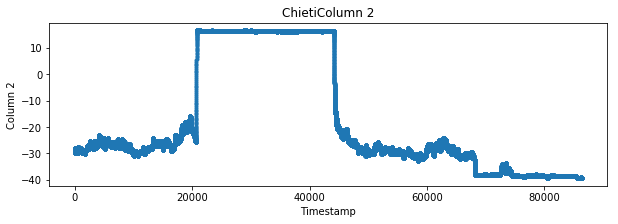

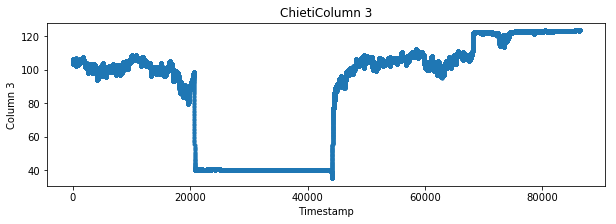

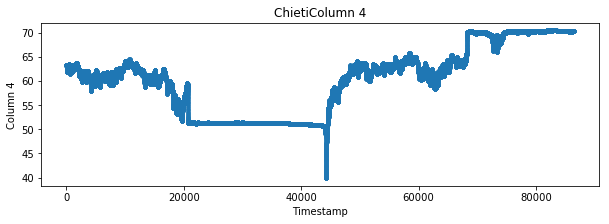

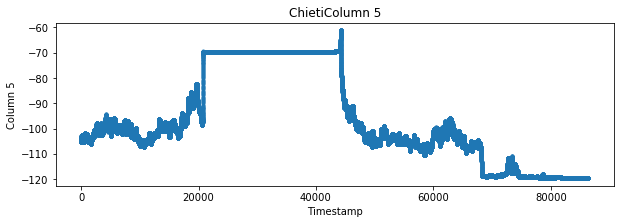

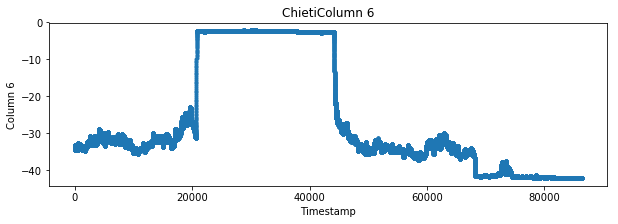

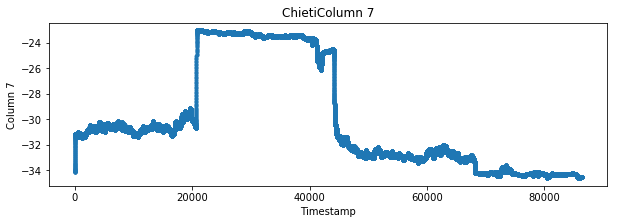

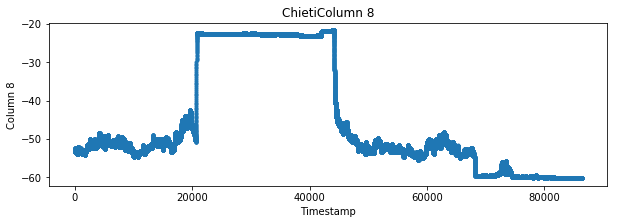

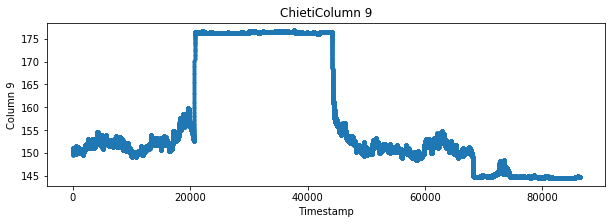

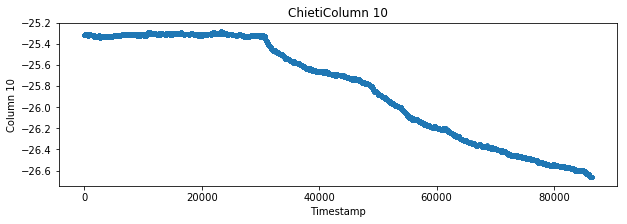

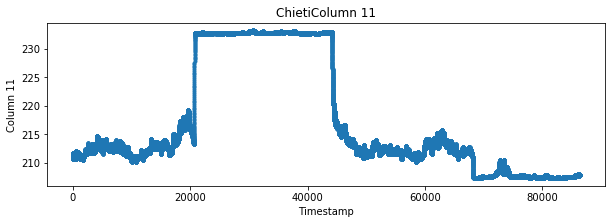

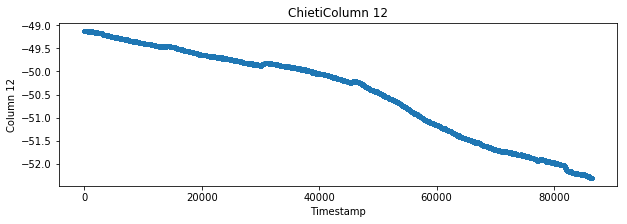

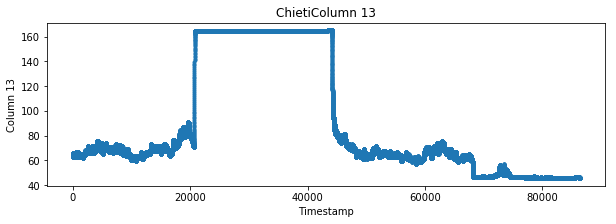

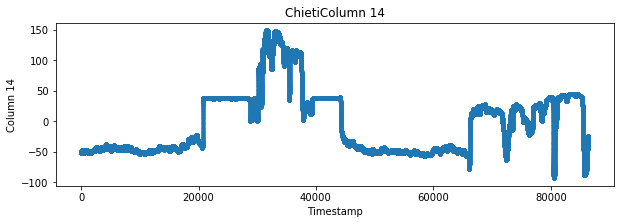

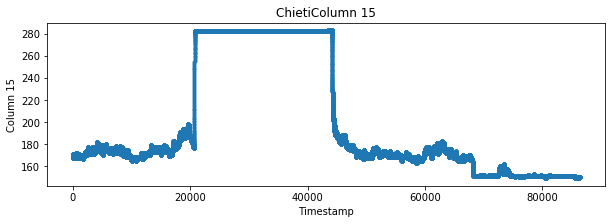

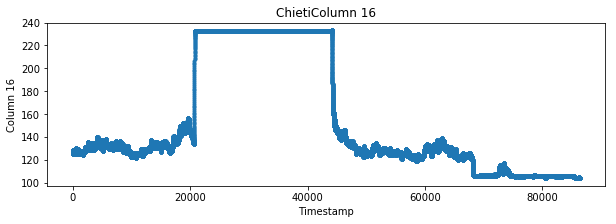

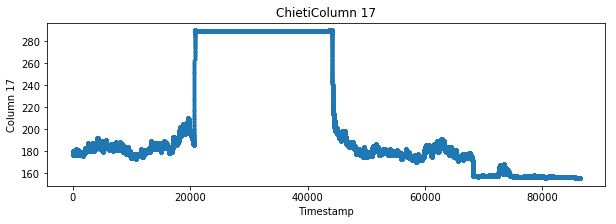

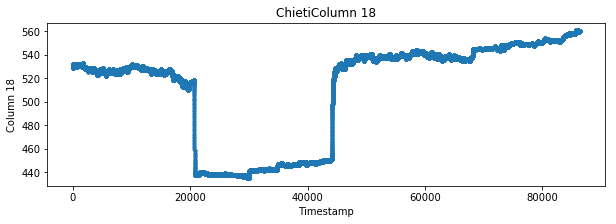

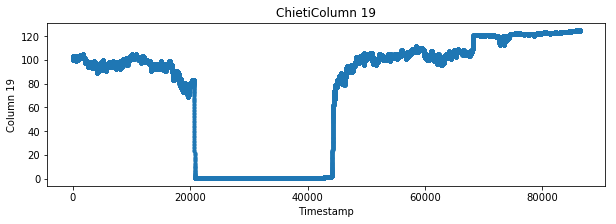

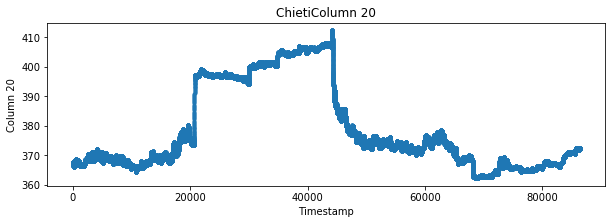

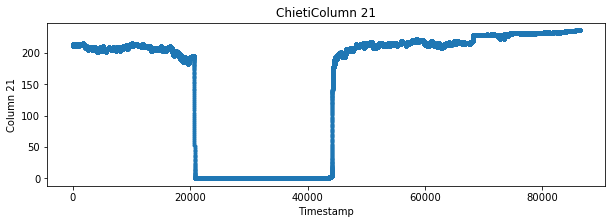

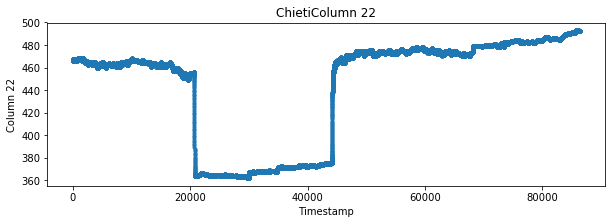

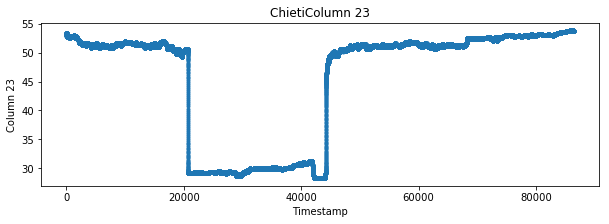

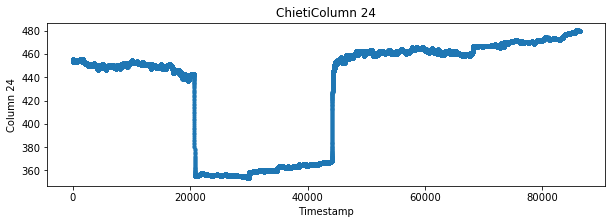

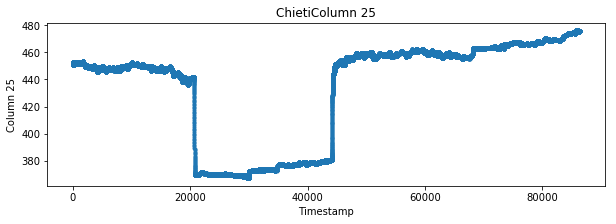

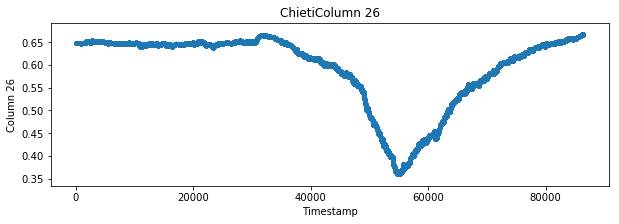

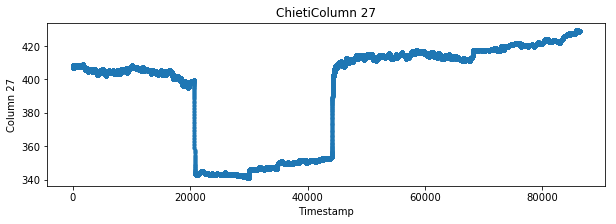

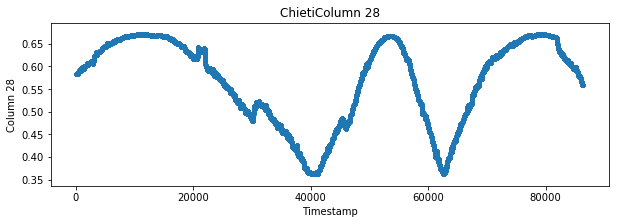

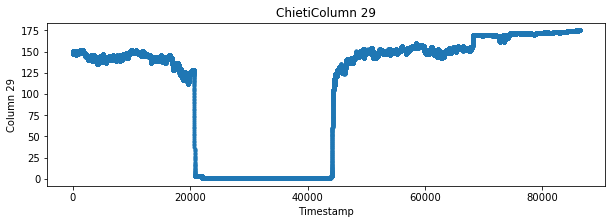

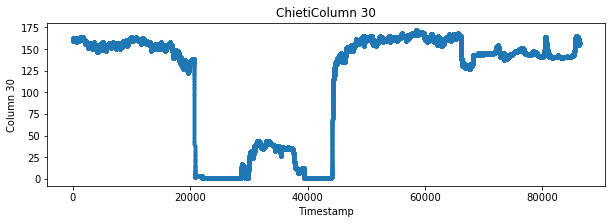

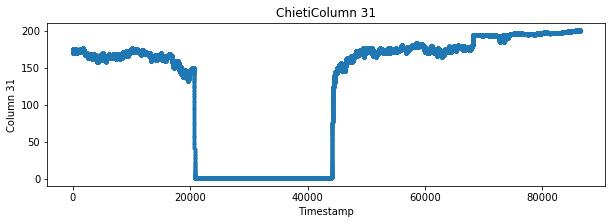

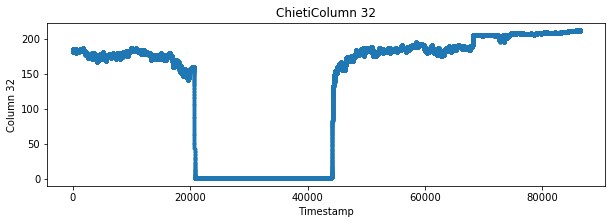

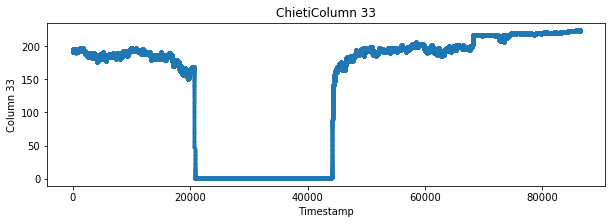

In [28]:
import numpy as np
from data_util.data_analyze import *
import sys

filename = 'cosmetecor data\s6-chieti\S6-CHIETI-170501.LOG'

num = num_datapoints(filename,dict=False)
X = np.zeros((32,num))
print X.shape

i = 0
with open(filename, 'rb') as f:
    reader = csv.reader(f, delimiter=' ')
    
    for row in reader:
        X[:,i] = row[2:]
        i += 1
f.close()

print "Data from Station 6 (Chieti)"
for i in range(32):   # Only print column 1-7, Column 8 is magnetic field vector (not needed)
    print "Column %d" % (i+2)
    print "Min: %f" % np.min(X[i,:])
    print "Max: %f" % np.max(X[i,:])
    
# plot Column 2
for i in range(32): 
    label = "Column %d" %(i+2)
    title = "Chieti"+label
    figure = plot_predictor(range(num), X[i], xlabel='Timestamp', ylabel=label, title=title)


## Consolidate Data

Here we try to merge all 2017 LOG files into a single csv file --> 3+Gb.


In [33]:
fout=open("out2017.csv","a")


for num in range(101,132)+range(201,229)+range(301,332)+range(401,431)+range(501,502):
    for line in open("cosmetecor data\s6-chieti\S6-CHIETI-170"+str(num)+".LOG"):
         fout.write(line)    
fout.close()


## Python Performance - Big CSV Files

The csv file with 4 months on consolidated log files is 3+Gb in size with 12M rows of data.

We need to quantify the memory and data I/O performance of working a file this size. 

Time to count 12M rows in a 3Gb csv file:
28.2630000114
Time to create the large numpy array:
0.0
(1L, 13132375L)
Memory used for numpy array = 52529612 bytes
Time to access the csv file to transfer 1 column of data:
55.3399999142
Data from Station 6 (Chieti)
Min: -39.458000
Max: 141.085999
Time to plot 12M datapoints:


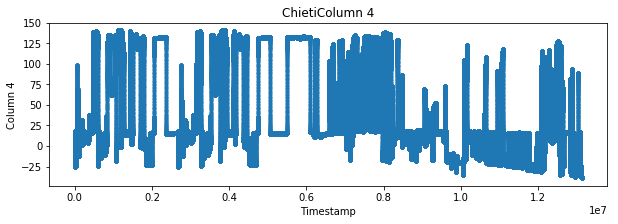

141.628000021


In [42]:
import numpy as np
from data_util.data_analyze import *
import sys
import time

filename = 'out2017.csv'

print "Time to count 12M rows in a 3Gb csv file:"
start = time.time()
num = num_datapoints(filename,dict=False)
end = time.time()
print end-start

print "Time to create the large numpy array:"
start = time.time()
X = np.zeros((1,num), dtype=np.float32)
end = time.time()
print end-start
print X.shape

num_bytes = sys.getsizeof(X)
print "Memory used for numpy array = %d bytes" % num_bytes

print "Time to access the csv file to transfer 1 column of data:"
start = time.time()
with open(filename, 'rb') as f:
    reader = csv.reader(f, delimiter=' ')
    i=0
    for row in reader:
        X[0,i] = row[2]
        i += 1
f.close()
end = time.time()
print end-start

print "Data from Station 6 (Chieti)"
print "Min: %f" % np.min(X[0,:])
print "Max: %f" % np.max(X[0,:])

print "Time to plot 12M datapoints:"
# plot Column 2
start = time.time()
i = 2
label = "Column %d" %(i+2)
title = "Chieti"+label
figure = plot_predictor(range(num), X[0], xlabel='Timestamp', ylabel=label, title=title)
end = time.time()
print end-start


## HDF5 File Format

HDF5 file format was specifically designed for high volume and/or complex data. HDF5 files can contain binary data and allow direct access to parts of the file without first parsing the entire contents.

The code below is a simple routine to create a HDF5 file and write data into it. We are writing a (32,12M) array of ones into the HDF5 file, h5py is smart enough to compress this into a small 2kB file, and it takes only 0.5sec to create it.


In [3]:
import h5py

size = 12000000  #12M rows

start = time.time()
# Step 1 - Create a hdf5 file
file = h5py.File ('file.h5', 'w')
X = np.ones((32,size), dtype=np.float32)
dataset = file.create_dataset("dset",(32,size), h5py.h5t.IEEE_F32BE)
dataset = X

file.close ()
end = time.time()
print end-start


0.505000114441


## Transfer Data from CSV to HDF5

Next we read (32,13M) of actual data from the csv file into a numpy array. The numpy array takes up 1.68Gb of memory.

The whole read-write operation from the csv file (in SSD) to the numpy array (in memory) takes 135 second. For the whole dataset (31Gb csv file), it will take 1350 seconds or 20+ minutes.

In [4]:
import h5py
from data_util.data_analyze import *

filename = 'out2017.csv'

print "Time to count 12M rows in a 3Gb csv file:"
start = time.time()
num = num_datapoints(filename,dict=False)
end = time.time()
print end-start

X = np.zeros((32,num), dtype=np.float32)
print X.shape
num_bytes = sys.getsizeof(X)
print "Memory used for numpy array = %d bytes" % num_bytes

print "Time to access the csv file to transfer 32 column of data:"
start = time.time()
with open(filename, 'rb') as f:
    reader = csv.reader(f, delimiter=' ')
    i=0
    for row in reader:
        X[:,i] = row[2:]
        i += 1
f.close()
end = time.time()
print end-start


Time to count 12M rows in a 3Gb csv file:
31.3930001259
(32L, 13132375L)
Memory used for numpy array = 1680944112 bytes
Time to access the csv file to transfer 32 column of data:
143.507000208


## Writing to HDF5 file

The operation above involves the creation of 1.68Gb of numpy array in memory and the read-write operation from csv to memory. Below, we perform a write operation into an HDF5 file.

Surprisingly, it takes only 5.6 seconds!!! And the resulting file is only 1.64Gb (50% smaller). 

In [5]:
print "Time to access the HDF5 file to write 32 column of data (32,13M):"
start = time.time()
file = h5py.File ('D:\geocosmo\cosmetecor data\chieti2017.h5', 'w')
dataset = file.create_dataset("dset",(32,num), h5py.h5t.IEEE_F32BE)
dataset[...] = X
file.close()
end = time.time()
print end-start

Time to access the HDF5 file to write 32 column of data (32,13M):
31.0020000935


## Reading from HDF5 file

Reading (32,13M) data from the HDF5 file on a USB 3.0 external hard drive takes 22 seconds!!!

In [7]:
Y = np.zeros((32,10), dtype=np.float32)
print Y.shape
print Y

print "Time to read 1 column of data (32 x 13M) from the HDF5 file:"
start = time.time()
file = h5py.File ('D:\geocosmo\cosmetecor data\chieti2017.h5', 'r')
dataset = file['/dset']
Y = dataset[...]
file.close()
end = time.time()
print end-start

print Y.shape
print Y

(32L, 10L)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## Release Memory 
These numpy arrays takes up 1.6G of RAM each. Release them!!!

In [98]:
Y = np.zeros((32,10), dtype=np.float32)
X = np.zeros((32,10), dtype=np.float32)
DateTime = np.zeros((32,10), dtype=np.float32)
TimeStamp = np.zeros((32,10), dtype=np.float32)

## Consolidate Daily .LOG files --> Annual .csv File

All the daily .LOG files will be consolidated into yearly .csv files:

* chieti2017
* chieti2016
* chieti2015
* chieti2014
* chieti2013


In [4]:
import h5py
from data_util.data_analyze import *
import glob
import csv

fout = open('chieti2013.csv','a')

i = 0
for filename in glob.glob('cosmetecor data\s6-chieti\S6-CHIETI-13*.LOG'):
    print filename
    for line in open(filename,'r'):
        fout.write(line)   
             
fout.close()


cosmetecor data\s6-chieti\S6-CHIETI-130121.log
cosmetecor data\s6-chieti\S6-CHIETI-130122.log
cosmetecor data\s6-chieti\S6-CHIETI-130123.log
cosmetecor data\s6-chieti\S6-CHIETI-130124.log
cosmetecor data\s6-chieti\S6-CHIETI-130125.log
cosmetecor data\s6-chieti\S6-CHIETI-130126.log
cosmetecor data\s6-chieti\S6-CHIETI-130127.log
cosmetecor data\s6-chieti\S6-CHIETI-130128.log
cosmetecor data\s6-chieti\S6-CHIETI-130129.log
cosmetecor data\s6-chieti\S6-CHIETI-130130.log
cosmetecor data\s6-chieti\S6-CHIETI-130131.log
cosmetecor data\s6-chieti\S6-CHIETI-130201.log
cosmetecor data\s6-chieti\S6-CHIETI-130202.log
cosmetecor data\s6-chieti\S6-CHIETI-130203.log
cosmetecor data\s6-chieti\S6-CHIETI-130204.log
cosmetecor data\s6-chieti\S6-CHIETI-130205.log
cosmetecor data\s6-chieti\S6-CHIETI-130206.log
cosmetecor data\s6-chieti\S6-CHIETI-130207.log
cosmetecor data\s6-chieti\S6-CHIETI-130208.log
cosmetecor data\s6-chieti\S6-CHIETI-130209.log
cosmetecor data\s6-chieti\S6-CHIETI-130210.log
cosmetecor da

## Brute Force Approach

This can be done in the following way:
1. Count the number of rows of data in the .csv file
2. Create in memory a numpy array that can hold the data
3. Read the data from the .csv file to memory
4. Open the .h5 file, and create the associated group (year) and the dataset 
5. Transfer the data from memory to the dataset in the .h5 file

In [58]:
import h5py
from data_util.data_analyze import *

filename = 'chieti2017.csv'

print "Number of rows of data in %s:" % filename
start = time.time()
num = num_datapoints(filename,dict=False)
end = time.time()
print num

print "Seconds taken is %.2f" % (end-start)


X = np.zeros((32,num), dtype=np.float32)
print X.shape
num_bytes = sys.getsizeof(X)
print "Memory used for numpy array = %d bytes" % num_bytes

start = time.time()
with open(filename, 'rb') as f:
    reader = csv.reader(f, delimiter=' ')
    i=0
    for row in reader:
        X[:,i] = row[2:]
        i += 1
f.close()
end = time.time()
print "Time to access the csv file to transfer 32 column of data: %.2f" % (end-start)



Number of rows of data in chieti2016.csv:
30949895
Seconds taken is 71.31
(32L, 30949895L)
Memory used for numpy array = 3961586672 bytes
Time to access the csv file to transfer 32 column of data: 328.08


In [61]:
print "Time to write to the HDF5 file:"
start = time.time()
file = h5py.File ('D:\geocosmo\cosmetecor data\chieti.h5', 'a')
dataset = file.create_dataset('2017/dataset',(32,num), h5py.h5t.IEEE_F32BE)
dataset[...] = X
file.close()
end = time.time()
print end-start

Time to write to the HDF5 file:
77.4709999561


In [4]:
import h5py

def printname(name):
    print name

file = h5py.File ('D:\geocosmo\cosmetecor data\s1-imfset_emf.h5', 'r')

# Explore group and datasets in the hdf5 file
file.visit(printname)

# print some data in dataset
dset = file['2015/emf_data'][:,10:20]
print dset
tset = file['2015/timestamp'][:,10:20]
print tset

file.close()

2013
2013/emf_data
2013/timestamp
2014
2014/emf_data
2014/timestamp
2015
2015/emf_data
2015/timestamp
2016
2016/emf_data
2016/timestamp
2017
2017/emf_data
2017/timestamp
[[   1.66799998    1.66799998    1.66799998    1.66900003    1.66900003
     1.66900003    1.66900003    1.66999996    1.66999996    1.66999996]
 [ 110.69799805  110.69799805  110.69799805  110.69799805  110.6969986
   110.6969986   110.6969986   110.6969986   110.6969986   110.6969986 ]
 [  19.63699913   19.63599968   19.63599968   19.63599968   19.63599968
    19.63599968   19.63599968   19.63599968   19.63599968   19.63599968]
 [  -8.66600037   -8.66600037   -8.66699982   -8.66699982   -8.66699982
    -8.66699982   -8.66699982   -8.66699982   -8.66800022   -8.66800022]
 [  -4.61999989   -4.61999989   -4.61999989   -4.61999989   -4.61999989
    -4.61999989   -4.62099981   -4.62099981   -4.62099981   -4.62099981]
 [   3.23000002    3.22900009    3.22900009    3.22900009    3.22900009
     3.22900009    3.22900009    3

## Add DateTime and TimeStamp

The approach above stored 32 rows of raw EMF data into a giant numpy array.

In the following code, we read in DateTime for the EMF measurements from the .csv file and convert them into UNIX TimeStamp, then we store them into a separate array.

HDF5 currently does not provide a time type, such as numpy.datetime64.

In [2]:
import h5py
from data_util.data_analyze import *
from datetime import datetime
import calendar

filename = 'chieti2017.csv'

print "Number of rows of data in %s:" % filename
start = time.time()
num = num_datapoints(filename,dict=False)
end = time.time()
print num

print "Seconds taken is %.2f" % (end-start)

TimeStamp = np.zeros((1,num), dtype= 'int')
print TimeStamp.shape
num_bytes = sys.getsizeof(TimeStamp)
print "Memory used for numpy array = %d bytes" % num_bytes

start = time.time()
with open(filename, 'rb') as f:
    reader = csv.reader(f, delimiter=' ')
    i=0
    for row in reader:
        dt = datetime.strptime(row[0]+' '+row[1], "%Y.%m.%d %H:%M:%S")
        TimeStamp[0,i] = datatime_2_timestamp(dt,utc=True)
        i += 1
f.close()
end = time.time()
print "Time to access the csv file to transfer 32 column of data: %.2f" % (end-start)

Number of rows of data in chieti2017.csv:
13132375
Seconds taken is 30.89
(1L, 13132375L)
Memory used for numpy array = 105059112 bytes
(1L, 13132375L)
Memory used for numpy array = 52529612 bytes


TypeError: long() argument must be a string or a number, not 'datetime.datetime'

# EMF DATASET WORKFLOW

The next few cells consist of work steps to generate .h5 files from the .LOG files we download from the FTP site:

1. Consolidate .LOG files of a single year into a .csv file for that year
2. Use the brute force approach outlined above to generate a .h5 file:
 * There is a group for every year
 * Under each group, there are 2 datasets - a numpy array for the EMF data and an array for the UNIX TimeStamp

## STEP 1 - Consolidate Daily .LOG files --> Annual .csv File

All the daily .LOG files will be consolidated into yearly .csv files:

* chieti2017
* chieti2016
* chieti2015
* chieti2014
* chieti2013

In [5]:
import glob
import csv

# Consolidate .LOG files for 2013 into a single .csv file
fout = open('chieti2013.csv','a')

for filename in glob.glob('cosmetecor data\s6-chieti\S6-CHIETI-13*.LOG'):
    print filename
    for line in open(filename,'r'):
        fout.write(line)   
             
fout.close()

# Consolidate .LOG files for 2014 into a single .csv file
fout = open('chieti2014.csv','a')

for filename in glob.glob('cosmetecor data\s6-chieti\S6-CHIETI-14*.LOG'):
    print filename
    for line in open(filename,'r'):
        fout.write(line)   
             
fout.close()

# Consolidate .LOG files for 2015 into a single .csv file
fout = open('chieti2015.csv','a')

for filename in glob.glob('cosmetecor data\s6-chieti\S6-CHIETI-15*.LOG'):
    print filename
    for line in open(filename,'r'):
        fout.write(line)   
             
fout.close()

# Consolidate .LOG files for 2016 into a single .csv file
fout = open('chieti2016.csv','a')

for filename in glob.glob('cosmetecor data\s6-chieti\S6-CHIETI-16*.LOG'):
    print filename
    for line in open(filename,'r'):
        fout.write(line)   
             
fout.close()

# Consolidate .LOG files for 2017 into a single .csv file
fout = open('chieti2017.csv','a')

for filename in glob.glob('cosmetecor data\s6-chieti\S6-CHIETI-17*.LOG'):
    print filename
    for line in open(filename,'r'):
        fout.write(line)   
             
fout.close()

cosmetecor data\s6-chieti\S6-CHIETI-130121.log
cosmetecor data\s6-chieti\S6-CHIETI-130122.log
cosmetecor data\s6-chieti\S6-CHIETI-130123.log
cosmetecor data\s6-chieti\S6-CHIETI-130124.log
cosmetecor data\s6-chieti\S6-CHIETI-130125.log
cosmetecor data\s6-chieti\S6-CHIETI-130126.log
cosmetecor data\s6-chieti\S6-CHIETI-130127.log
cosmetecor data\s6-chieti\S6-CHIETI-130128.log
cosmetecor data\s6-chieti\S6-CHIETI-130129.log
cosmetecor data\s6-chieti\S6-CHIETI-130130.log
cosmetecor data\s6-chieti\S6-CHIETI-130131.log
cosmetecor data\s6-chieti\S6-CHIETI-130201.log
cosmetecor data\s6-chieti\S6-CHIETI-130202.log
cosmetecor data\s6-chieti\S6-CHIETI-130203.log
cosmetecor data\s6-chieti\S6-CHIETI-130204.log
cosmetecor data\s6-chieti\S6-CHIETI-130205.log
cosmetecor data\s6-chieti\S6-CHIETI-130206.log
cosmetecor data\s6-chieti\S6-CHIETI-130207.log
cosmetecor data\s6-chieti\S6-CHIETI-130208.log
cosmetecor data\s6-chieti\S6-CHIETI-130209.log
cosmetecor data\s6-chieti\S6-CHIETI-130210.log
cosmetecor da

In [20]:
import h5py
from data_util.data_analyze import *

years = [2013,2014,2015,2016,2017]
fout = h5py.File ('D:/geocosmo/cosmetecor data/chieti_emf.h5', 'w')

for year in years:
    filename = 'chieti'+str(year)+'.csv'
    print filename
    
    # Count the number of rows of data
    print "Number of rows of data in %s:" % filename
    start = time.time()
    num = num_datapoints(filename,dict=False)
    end = time.time()
    print num
    print "Seconds taken is %.2f" % (end-start)

    # Create the arrays in memory to hold them
    # X - to hold the EMF measurements
    X = np.zeros((32,num), dtype=np.float32)
    print X.shape
    num_bytes = sys.getsizeof(X)
    print "Memory used for numpy array = %d bytes" % num_bytes

    # Timestamp - to hold the UNIX timestamp of the EMF data
    TimeStamp = np.zeros((1,num), dtype= 'int')
    print TimeStamp.shape
    num_bytes = sys.getsizeof(TimeStamp)
    print "Memory used for numpy array = %d bytes" % num_bytes

    # Transfer data from .csv file to memory
    start = time.time()
    with open(filename, 'rb') as f:
        reader = csv.reader(f, delimiter=' ')
        i=0
        for row in reader:
            dt = datetime.strptime(row[0]+' '+row[1], "%Y.%m.%d %H:%M:%S")
            TimeStamp[0,i] = datatime_2_timestamp(dt,utc=True)
            X[:,i] = row[2:]
            i += 1
    f.close()
    end = time.time()
    print "Time to access the csv file to transfer 32 column of data: %.2f" % (end-start)

    # Transfer data from memory to the datasets in .h5 file
    print "Time to write to the HDF5 file:"
    start = time.time()
    dset_name = str(year)+'/emf_data'
    tset_name = str(year)+'/timestamp'
    emf_data = fout.create_dataset(dset_name,(32,num), dtype="float")
    emf_data[...] = X
    timestamp = fout.create_dataset(tset_name,(1,num), dtype="int")
    timestamp[...] = TimeStamp
    end = time.time()
    print end-start

fout.close()    

chieti2013.csv
Number of rows of data in chieti2013.csv:
29073265
Seconds taken is 66.29
(32L, 29073265L)
Memory used for numpy array = 3721378032 bytes
(1L, 29073265L)
Memory used for numpy array = 116293172 bytes
Time to access the csv file to transfer 32 column of data: 962.55
Time to write to the HDF5 file:
134.073000193
chieti2014.csv
Number of rows of data in chieti2014.csv:
31336474
Seconds taken is 71.39
(32L, 31336474L)
Memory used for numpy array = 4011068784 bytes
(1L, 31336474L)
Memory used for numpy array = 125346008 bytes
Time to access the csv file to transfer 32 column of data: 1009.81
Time to write to the HDF5 file:
155.42200017
chieti2015.csv
Number of rows of data in chieti2015.csv:
31529078
Seconds taken is 71.21
(32L, 31529078L)
Memory used for numpy array = 4035722096 bytes
(1L, 31529078L)
Memory used for numpy array = 126116424 bytes
Time to access the csv file to transfer 32 column of data: 987.30
Time to write to the HDF5 file:
159.089999914
chieti2016.csv
Numb

## .h5 File Structure

In [3]:
def printname(name):
    print name

file = h5py.File ('D:/geocosmo/cosmetecor data/chieti_emf.h5', 'r')

# Explore group and datasets in the hdf5 file
file.visit(printname)

print file['2013/emf_data'].shape
print file['2014/emf_data'].shape
print file['2015/emf_data'].shape
print file['2016/emf_data'].shape
print file['2017/emf_data'].shape

print file['2013/timestamp'].shape
print file['2014/timestamp'].shape
print file['2015/timestamp'].shape
print file['2016/timestamp'].shape
print file['2017/timestamp'].shape

# print some data in dataset
# dset = file['2015/dataset'][:,10:20]
# print dset

file.close()

2013
2013/emf_data
2013/timestamp
2014
2014/emf_data
2014/timestamp
2015
2015/emf_data
2015/timestamp
2016
2016/emf_data
2016/timestamp
2017
2017/emf_data
2017/timestamp
(32, 29073265)
(32, 31336474)
(32, 31529078)
(32, 30949895)
(32, 10454030)
(1, 29073265)
(1, 31336474)
(1, 31529078)
(1, 30949895)
(1, 10454030)


## Delete Datasets

The code belows allows us to delete any dataset.

In [91]:
with h5py.File('D:\geocosmo\cosmetecor data\chieti.h5', 'a') as f:
    f.__delitem__('2015/timestamp')
    

## Close a File

In [25]:
f.close()

## Random Check - 1

This makes sure that the EMF and timing data are not corrupted when converting from .csv files to .h5 groups and datasets. 

First, figure out the number of rows in the .csv file.

In [51]:
from data_util.data_analyze import *


filename = 'D:\geocosmo\cosmetecor data\chieti2013.csv'
h5_timestamp = '2013/timestamp'
h5_emf = '2013/emf_data'

print "Number of rows of data in %s:" % filename
num = num_datapoints(filename,dict=False)

print num



Number of rows of data in D:\geocosmo\cosmetecor data\chieti2013.csv:
29073265


## Random Check - 2

Next, select 3 random row in the .csv file. Print out their content.

In [61]:
import random
import csv
from data_util.data_analyze import *
from datetime import datetime

# Randomly select 3 rows in a .csv file (a year of EMF data)
random_rows = []
random_rows =sorted(random.sample(xrange(num),3))
print random_rows
Timestamps = []
EMFs = np.zeros((32,3))

f = open(filename, 'r')
reader = csv.reader(f, delimiter=' ')

j=0
for i, row in enumerate(reader):
    if i in random_rows:
        print "%s\n" %(row[0]+' '+row[1])
        dt = datetime.strptime(row[0]+' '+row[1], "%Y.%m.%d %H:%M:%S")
        Timestamps.append(datatime_2_timestamp(dt,utc=True))
        EMFs[:,j] =row[2:]
        j += 1

f.close()

print Timestamps
print EMFs


[3144499, 16858288, 18998424]
2013.03.06 14:09:56

2013.08.12 14:19:56

2013.09.06 09:12:20

[1362578996, 1376317196, 1378458740]
[[  21.705   28.629   31.226]
 [  33.831    6.226   -4.805]
 [  50.127   33.027   26.279]
 [   2.038  -27.238  -24.327]
 [  53.849   16.645   12.673]
 [-106.843  -96.65   -88.584]
 [ -47.707  -60.081  -57.293]
 [  76.561  105.791  100.034]
 [  10.619  -17.788  -20.91 ]
 [ 151.629  213.129  139.425]
 [   0.617  -92.244  -72.134]
 [  50.577   95.619   95.342]
 [ -25.428  -39.004  -30.36 ]
 [ 160.137  258.223  167.439]
 [ 160.559  166.167   95.196]
 [ 152.825  143.637  123.341]
 [ 288.956  331.144  317.949]
 [   0.721    0.66     0.481]
 [ 262.758  301.741  289.624]
 [   0.791    0.436    0.651]
 [ 241.461  277.72   266.632]
 [  16.       0.463    0.709]
 [ 224.695  259.623  249.261]
 [ 245.26   280.926  269.737]
 [   0.412    0.668    0.443]
 [ 227.503  261.878  250.786]
 [   0.459    0.661    0.671]
 [   0.932    0.687    0.622]
 [   1.053    0.676    0.779]


## Random Check - 3

Go to the .h5 file and get the corresponding 3 rows from the group/dataset.

Do a matrix subtraction of the 3 rows in the .h5 file from the 3 rows in the .csv, and print out the difference. It should be very small.

In [62]:
def index(array, item):
    for idx, val in np.ndenumerate(array):
        if val == item:
            return idx
        
file = h5py.File ('D:\geocosmo\cosmetecor data\chieti_emf.h5', 'r')
h5_EMFs = np.zeros((32,3))

print file[h5_timestamp].shape
print file[h5_timestamp].dtype

for i, time in enumerate(Timestamps):
    idx = index(file[h5_timestamp],time)
    print(idx[1])
    h5_EMFs[:,i] = file[h5_emf][:,idx[1]]

file.close()

diff = np.sum(h5_EMFs - EMFs)
print diff

(1, 29073265)
int32
3144499
16858288
18998424
-6.685042381e-05


## Random Check - 4

Print out the 3 rows from the .h5 file and from the .csv file. The difference is due to the datatype casting.

In [64]:
print h5_EMFs
print EMFs

[[  21.70499992   28.62899971   31.22599983]
 [  33.83100128    6.22599983   -4.80499983]
 [  50.1269989    33.02700043   26.27899933]
 [   2.03800011  -27.23800087  -24.32699966]
 [  53.84899902   16.64500046   12.67300034]
 [-106.84300232  -96.65000153  -88.58399963]
 [ -47.70700073  -60.08100128  -57.29299927]
 [  76.56099701  105.79100037  100.03399658]
 [  10.61900043  -17.78800011  -20.90999985]
 [ 151.6289978   213.1289978   139.42500305]
 [   0.61699998  -92.2440033   -72.13400269]
 [  50.57699966   95.6190033    95.34200287]
 [ -25.4279995   -39.00400162  -30.36000061]
 [ 160.13699341  258.22299194  167.43899536]
 [ 160.55900574  166.16700745   95.19599915]
 [ 152.82499695  143.63699341  123.34100342]
 [ 288.95599365  331.14401245  317.94900513]
 [   0.72100002    0.66000003    0.48100001]
 [ 262.75799561  301.74099731  289.62399292]
 [   0.79100001    0.43599999    0.65100002]
 [ 241.46099854  277.72000122  266.63198853]
 [  16.            0.463         0.70899999]
 [ 224.695

## CSV --> H5 Conversion

The code below convert the data from .csv to .h5.

* The datetime and EMF data contained in the yearly .csv files, are cleaned, processed and written into a single .h5 file. 
* Datatime is converted into Timestamp as written into 'year/timestamp' dataset
* EMF data is written into 'year/emf_data' dataset



In [3]:
import h5py
import sys
from data_util.data_analyze import *
from datetime import datetime
import calendar

#years = [2013,2014,2015,2016,2017]
#h5_filename = 'D:/geocosmo/cosmetecor data/s1-imfset_emf.h5'
#csv_filename_header = 'D:\geocosmo\cosmetecor data\s1-imfset'
# NUM_COLUMN = 32

#years = [2012,2013,2014,2015,2016,2017]
#h5_filename = 'D:/geocosmo/cosmetecor data/s2-imfset_emf.h5'
#csv_filename_header = 'D:\geocosmo\cosmetecor data\s2-imfset'
#NUM_COLUMN = 32

years = [2012]
h5_filename = 'E:/geocosmo/cosmetecor data/s2-imfset_emf.h5'
csv_filename_header = 'cosmetecor data\s2-imfset'
NUM_COLUMN = 28

fout = h5py.File (h5_filename, 'w')

for year in years:
    filename = csv_filename_header+str(year)+'.csv'
    print filename
    
    # Count the number of rows of data
    print "Number of rows of data in %s:" % filename
    start = time.time()
    num = num_datapoints(filename,dict=False)
    end = time.time()
    print num
    print "Seconds taken is %.2f" % (end-start)

    # Create the arrays in memory to hold them
    # X - to hold the EMF measurements
    X = np.zeros((NUM_COLUMN,num), dtype=np.float32)
    print X.shape
    num_bytes = sys.getsizeof(X)
    print "Memory used for numpy array = %d bytes" % num_bytes

    # Timestamp - to hold the UNIX timestamp of the EMF data
    TimeStamp = np.zeros((1,num), dtype= 'int')
    print TimeStamp.shape
    num_bytes = sys.getsizeof(TimeStamp)
    print "Memory used for numpy array = %d bytes" % num_bytes

    # Transfer data from .csv file to memory
    start = time.time()
    with open(filename, 'rb') as f:
        reader = csv.reader(f, delimiter=' ')
        idx=0
        for row in reader:
            dt = datetime.strptime(row[0]+' '+row[1], "%Y.%m.%d %H:%M:%S")
            TimeStamp[0,idx] = datatime_2_timestamp(dt,utc=True)
            
            # This try-except statement identifies LOG files which do not contain the expected number of columns
            # of EMF data.
            try:
                for i, x in enumerate(row):
                    if x == '':
                        row[i] = np.NaN  # Replace any empty string "" with NaN
                X[:,idx] = row[2:NUM_COLUMN+2]
            except ValueError:
                print row
                fout.close()
                raise
            if idx < 2:     # Print out the first 2 rows
                print row
                print X
                print TimeStamp
            idx += 1
    f.close()
    end = time.time()
    print "Time to access the csv file to transfer %d column of data: %.2f" % (NUM_COLUMN,end-start)

    # Transfer data from memory to the datasets in .h5 file
    print "Time to write to the HDF5 file:"
    start = time.time()
    dset_name = str(year)+'/emf_data'
    tset_name = str(year)+'/timestamp'
    emf_data = fout.create_dataset(dset_name,(NUM_COLUMN,num), dtype="float32")
    emf_data[...] = X
    timestamp = fout.create_dataset(tset_name,(1,num), dtype="int")
    timestamp[...] = TimeStamp
    end = time.time()
    print end-start

fout.close()

cosmetecor data\s2-imfset2012.csv
Number of rows of data in cosmetecor data\s2-imfset2012.csv:
11914709
Seconds taken is 27.27
(28L, 11914709L)
Memory used for numpy array = 667223816 bytes
(1L, 11914709L)
Memory used for numpy array = 47658948 bytes
['2012.08.03', '00:00:00', '308.579', '-176.082', '131.846', '17.048', '147.532', '-128.96', '18.642', '-143.825', '-28.269', '-172.563', '75.33', '-97.905', '-59.709', '-158.044', '834.936', '38.593', '861.007', '11.247', '856.937', '5.076', '856.689', '641.504', '22.236', '660.494', '21.076', '679.323', '11.732', '689.84', nan, nan, nan, nan]
[[ 308.5         0.          0.       ...,    0.          0.          0.      ]
 [-176.125       0.          0.       ...,    0.          0.          0.      ]
 [ 131.875       0.          0.       ...,    0.          0.          0.      ]
 ..., 
 [ 679.5         0.          0.       ...,    0.          0.          0.      ]
 [  11.734375    0.          0.       ...,    0.          0.          0.   

## Data Cleaning

Figure a fast way to replace a value in a large array. The first option "List Comprehension" is probably the cleanest.

In [23]:
Z = np.random.randint(10, size=500000)
start = time.time()
Z = [100 if x==4 else x for x in Z]
end = time.time()
print end-start
print Z[:30]

Z = np.random.randint(10, size=500000)
start = time.time()
Z = map(lambda x:x if x!= 4 else 100,Z)
end = time.time()
print end-start
print Z[:30]

Z = np.random.randint(10, size=500000)
start = time.time()
for n,i in enumerate(Z):
    if i==4:
        Z[n]=100
end = time.time()
print end-start
print Z[:30]

0.18799996376
[0, 7, 6, 3, 5, 7, 8, 0, 9, 6, 3, 6, 1, 1, 6, 100, 100, 5, 2, 3, 1, 6, 1, 3, 1, 3, 3, 2, 8, 3]
0.159999847412
[2, 9, 100, 0, 7, 3, 3, 6, 5, 8, 0, 7, 5, 7, 6, 2, 9, 0, 2, 100, 1, 1, 0, 1, 7, 5, 3, 5, 7, 5]
0.181999921799
[  3   0   1   0   6   2   7   9   7   6   9 100   6   6   0   7   2   0
   7   3   3   8   1   1   5   5   5   7   8   3]


In [33]:
import csv

with open('D:/geocosmo/cosmetecor data/s1-desp-pk2017.csv', 'rb') as f:
    reader = csv.reader(f, delimiter=' ')
    i = 0
    for row in reader:
        i += 1
        if i is 1:
            print "There are %d items per row of data" %len(row) 
            
        if i < 5:
            print row   # Print first 5 rows
            
        if i > 10:
            break
               
f.close()

There are 34 items per row of data
['2017.01.01', '00:00:01', '-8.751', '-205.111', '-213.456', '69.776', '-143.027', '46.214', '-93.577', '-133.098', '-224.123', '-0.985', '-224.363', '74.674', '-83.768', '-293.567', '-223.465', '-176.317', '38.447', '68.534', '102.357', '43.718', '57.425', '24.871', '33.998', '74.002', '103.559', '42.854', '68.219', '61.093', '26.005', '45.375', '21.534', '29.836']
['2017.01.01', '00:00:02', '-8.750', '-205.111', '-213.455', '69.775', '-143.027', '46.214', '-93.576', '-133.098', '-224.122', '-0.986', '-224.362', '74.675', '-83.769', '-293.567', '-223.466', '-176.318', '38.451', '68.545', '102.372', '43.731', '57.432', '24.874', '34.002', '74.013', '103.568', '42.864', '68.224', '61.095', '26.003', '45.380', '21.550', '29.843']
['2017.01.01', '00:00:03', '-8.750', '-205.110', '-213.454', '69.775', '-143.026', '46.214', '-93.575', '-133.098', '-224.121', '-0.986', '-224.361', '74.677', '-83.769', '-293.567', '-223.466', '-176.318', '38.454', '68.559', 

In [26]:
f.close()